# Analyse de l'incidence de la varicelle

In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

 Les données de l'incidence de la varicelle sont disponibles du site Web du Réseau Sentinelles. Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
raw_data = pd.read_csv(data_url, skiprows=1)

In [3]:
print(raw_data.head())

     week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202422          7  11317     7330   15304      17          11         23   
1  202421          7   9807     6926   12688      15          11         19   
2  202420          7  13661    10209   17113      20          15         25   
3  202419          7  10083     6413   13753      15           9         21   
4  202418          7  13438     9514   17362      20          14         26   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France  


In [4]:
data = raw_data.dropna().copy()

In [5]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

In [6]:
data['period'] = [convert_week(yw) for yw in data['week']]

In [7]:
sorted_data = data.set_index('period').sort_index()

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

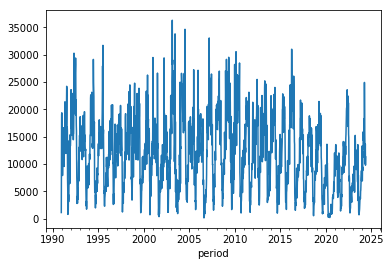

In [9]:
sorted_data['inc'].plot()

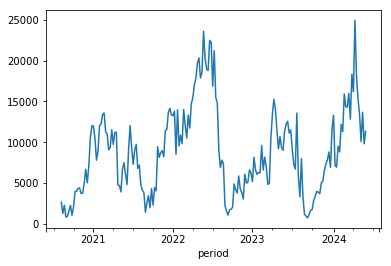

In [10]:
sorted_data['inc'][-200:].plot()

In [11]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1985, sorted_data.index[-1].year)]

year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1], first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

NameError: name 'first_august_week' is not defined

In [ ]:
yearly_incidence.plot(style='*')

In [ ]:
yearly_incidence.sort_values()

In [ ]:
yearly_incidence.hist(xrot=20)